/tmp/ipython-input-556181220.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', end='2023-12-01', freq='M')


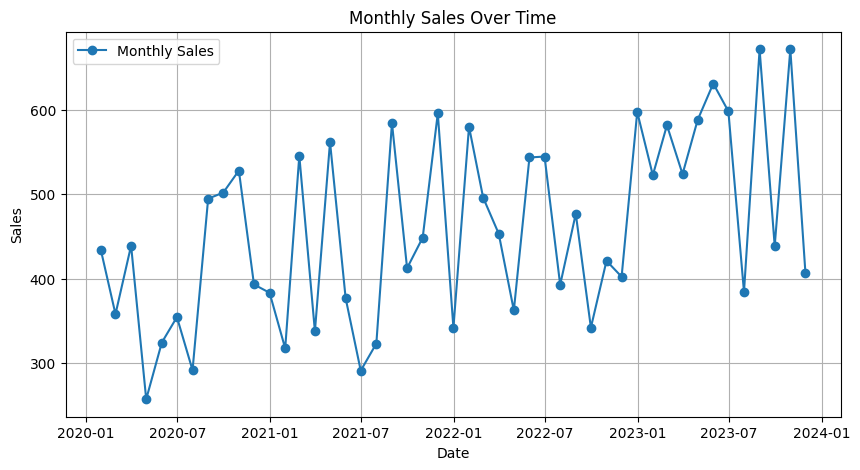

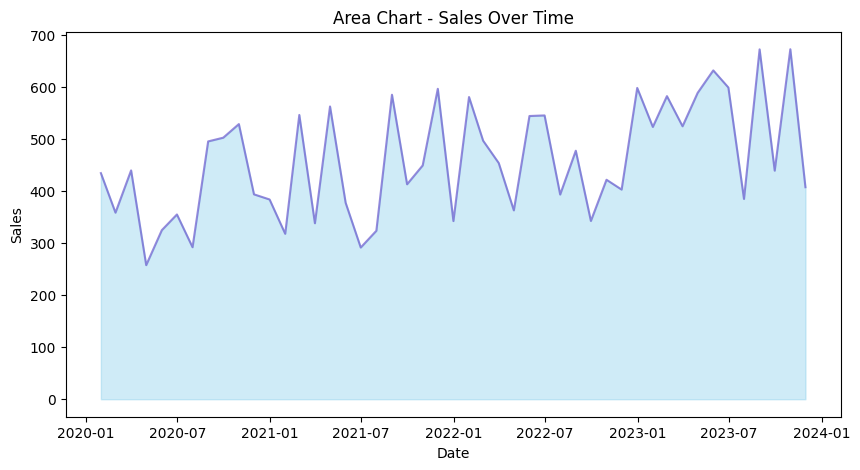

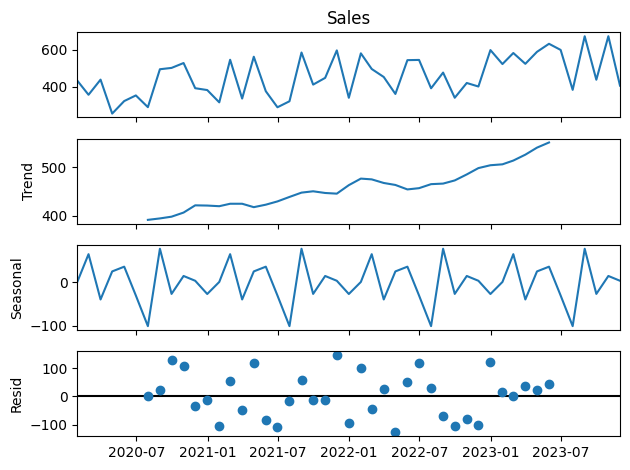

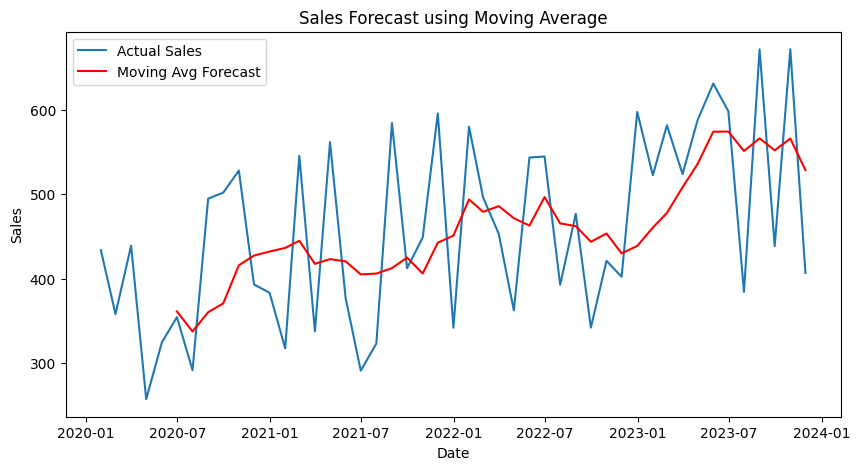

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

date_rng = pd.date_range(start='2020-01-01', end='2023-12-01', freq='M')
sales = np.random.randint(200, 500, size=len(date_rng)) + np.linspace(10, 200, len(date_rng))

data = pd.DataFrame({'Date': date_rng, 'Sales': sales})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Sales'], marker='o', label='Monthly Sales')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.fill_between(data.index, data['Sales'], color="skyblue", alpha=0.4)
plt.plot(data.index, data['Sales'], color="Slateblue", alpha=0.7)
plt.title("Area Chart - Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

result = seasonal_decompose(data['Sales'], model='additive', period=12)
result.plot()
plt.show()

data['Forecast'] = data['Sales'].rolling(window=6).mean()

plt.figure(figsize=(10,5))
plt.plot(data['Sales'], label="Actual Sales")
plt.plot(data['Forecast'], color='red', label="Moving Avg Forecast")
plt.title("Sales Forecast using Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
